In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('E:\data')
titanic_data = pd.read_csv('./data01/titanic/train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Mission 1. 유의미한 Feature 찾기##

In [3]:
# SibSp = 1 : 배우자 또는 형제 동승, Parch = 1 : 자녀 혹은 부모 동승, Fare : 운임요금, 
# Embarked : 탑승한 항구명(C = Cherbourg, Q = Queenstown, S = Southampton)

<AxesSubplot:xlabel='Survived', ylabel='count'>

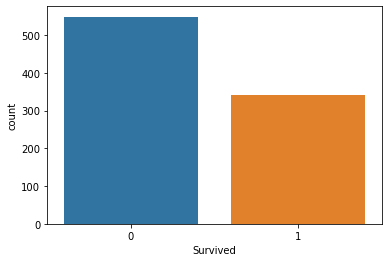

In [4]:
titanic_data['Survived'].value_counts()
sns.countplot(x='Survived', data=titanic_data)

### 1-1. 생존자의 성별에 따른 동승자(배우자, 형제)의 분포 ###

In [77]:
survival = titanic_data[titanic_data['Survived'] == 1]
survival_with_sp = survival.pivot_table('Survived', 'SibSp', 'Sex', aggfunc='count')
survival_with_sp

Sex,female,male
SibSp,,
0,137.0,73.0
1,80.0,32.0
2,10.0,3.0
3,4.0,NaN
4,2.0,1.0


In [78]:
dead = titanic_data[titanic_data['Survived'] == 0]
dead_with_sp = dead.pivot_table('Survived', 'SibSp', 'Sex', aggfunc='count')
dead_with_sp

Sex,female,male
SibSp,,
0,37,361
1,26,71
2,3,12
3,7,5
4,4,11
5,1,4
8,3,4


Text(0.5, 1.0, 'Distribution of passengers (spouses, siblings) by gender of survivors')

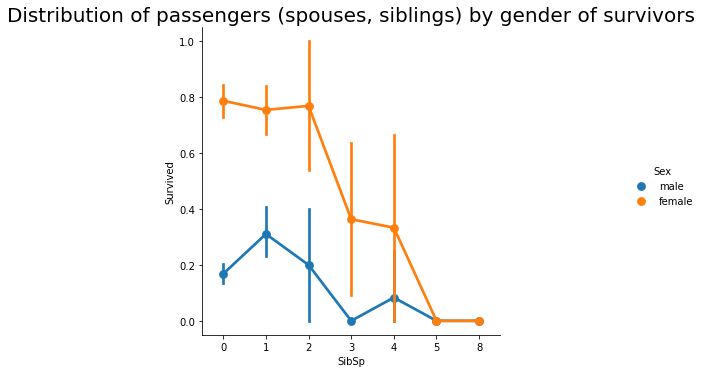

In [228]:
sns.catplot(x='SibSp', y='Survived', hue='Sex', kind='point', data=titanic_data)
plt.title('Distribution of passengers (spouses, siblings) by gender of survivors', fontsize=20)

### 동승자 수에 따른 생존여부 heatmap ###

Text(0.5, 1.0, 'Survival status based on number of passengers')

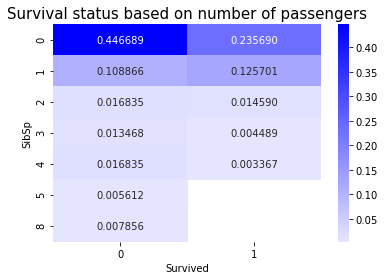

In [229]:
survived_with_sp = titanic_data.pivot_table('PassengerId', 'SibSp', 'Survived', aggfunc='count')
sns.heatmap(survived_with_sp/len(titanic_data), cmap=sns.light_palette("blue", as_cmap=True), annot=True, fmt="f")
plt.title('Survival status based on number of passengers', fontsize=15)

### 생존자의 동승자 수와 성별에 따른 heatmap ###

Text(0.5, 1.0, 'Heatmap according to number of passengers and gender of survivors')

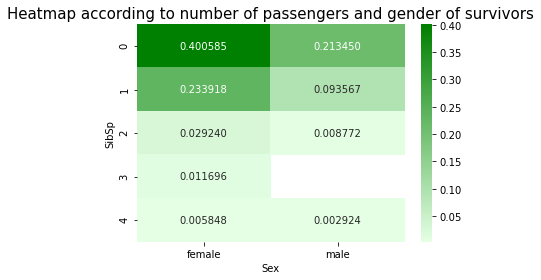

In [230]:
sns.heatmap(survival_with_sp/len(survival), cmap=sns.light_palette("green", as_cmap=True), annot=True, fmt="f")
plt.title('Heatmap according to number of passengers and gender of survivors', fontsize=15)

### 사망자의 동승자 수와 성별에 따른 heatmap ###

Text(0.5, 1.0, 'Heatmap according to the number of passengers killed and gender')

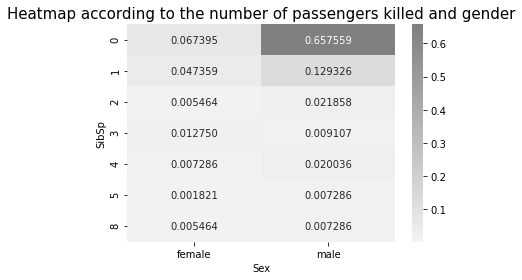

In [231]:
sns.heatmap(dead_with_sp/len(dead), cmap=sns.light_palette("gray", as_cmap=True), annot=True, fmt="f")
plt.title('Heatmap according to the number of passengers killed and gender', fontsize=15)

### 동승자 수에 따른 생존자 수 분포 ### 

Text(0.5, 1.0, 'Distribution of the number of survivors according to the number of passengers')

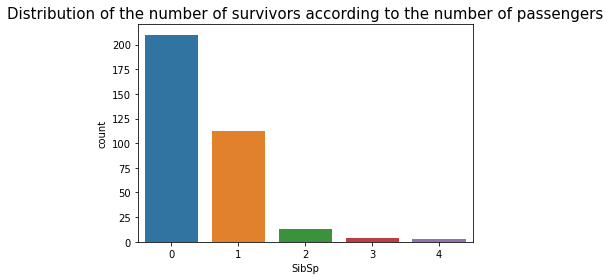

In [232]:
sns.countplot(survival['SibSp'])
plt.title('Distribution of the number of survivors according to the number of passengers', fontsize=15)

## 1-1 result : 생존자 중에서, 여성이면서 동승한 형제 혹은 배우자가 없거나 1명인 생존자가 많았다. ##

### 1-2. 운임요금에 따른 생존여부 ###

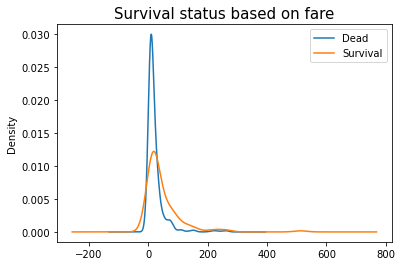

In [233]:
titanic_data['Fare'][titanic_data.Survived==0].plot(kind='kde')
titanic_data['Fare'][titanic_data.Survived==1].plot(kind='kde')
plt.title('Survival status based on fare', fontsize=15)
plt.legend(['Dead', 'Survival'])

### 생존자와 사망자의 운임요금의 평균 비교 ### 

In [96]:
m = titanic_data.groupby('Survived')['Fare'].mean()
m

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

## 1-2 result : 평균적으로, 생존한 사람들의 운임요금이 더 비쌌다. ##

## Mission2 : Kaggle DataSet ##

## 포켓몬의 승률에 영향을 주는 요소는? ##

## 1. 승률과 타입 ## 

In [138]:
pokemon_data = pd.read_csv('./data01/Pokemon.csv')
pokemon_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


#### 각 포켓몬의 승률 ####

In [139]:
battle_data = pd.read_csv('./data01/combats.csv')
battle_data

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [140]:
battle_data['count'] = 1
battle_data

,First_pokemon,Second_pokemon,Winner,count
0,266,298,298,1
1,702,701,701,1
2,191,668,668,1
3,237,683,683,1
4,151,231,151,1
...,...,...,...,...
49995,707,126,707,1
49996,589,664,589,1
49997,303,368,368,1
49998,109,89,109,1


In [141]:
# 승률 구하기
all_battles = battle_data.groupby('First_pokemon')['count'].sum() + battle_data.groupby('Second_pokemon')['count'].sum() 
win_battles = battle_data.groupby('Winner')['count'].sum()
win_battles/all_battles

1      0.278195
2      0.380165
3      0.674242
4      0.560000
5      0.491071
         ...   
796    0.371429
797    0.885496
798    0.504202
799    0.618056
800    0.619835
Name: count, Length: 784, dtype: float64

In [142]:
pokemon_data['PoV'] = win_battles/all_battles
pokemon_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,PoV
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,NaN
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.278195
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.380165
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.674242
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.560000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,0.747664
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,0.371429
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,0.885496
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,0.504202


In [145]:
pokemon_data = pokemon_data[pokemon_data['PoV'].isnull() == False]
pokemon_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,PoV
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.278195
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.380165
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.674242
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.560000
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,0.747664
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,0.371429
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,0.885496
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,0.504202


#### 가장 승률이 높은 상위 5개 포켓몬 ###

In [147]:
best_pov = pokemon_data.sort_values('PoV', ascending=False)
best_pov['Name'].head(5)

155                      Snorlax
513                    Magnezone
704     ThundurusIncarnate Forme
20                        Pidgey
154    AerodactylMega Aerodactyl
Name: Name, dtype: object

In [281]:
pokemon_data[pokemon_data['Name'] == 'Snorlax']
(pokemon_data.loc[[155], ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
155,160,110,65,65,110,30


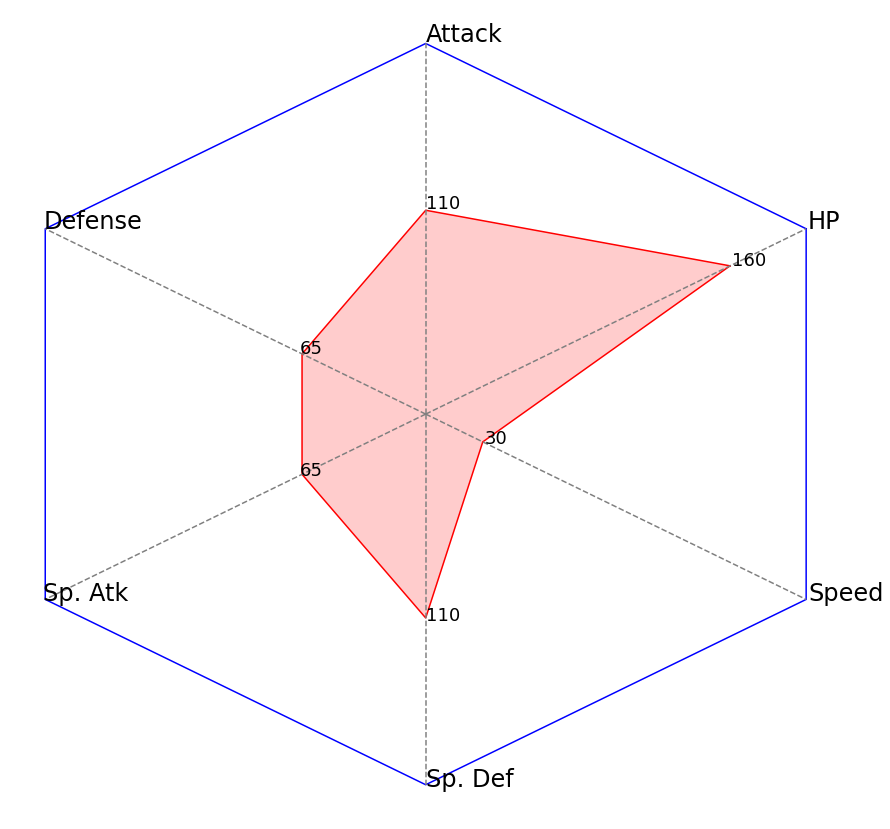

In [283]:
# 육각형 그래프 그리기, 참고 : https://pbj0812.tistory.com/360
def honeycomb_list(inp):
    result_x = []
    result_y = []
    for i in range(6):
        theta = (2 * np.pi / 6) * (i + 1) - (2 * np.pi / 6) / 2
        result_x.append(inp[i] * np.cos(theta))
        result_y.append(inp[i] * np.sin(theta))
    theta = (2 * np.pi / 6) * (0 + 1) - (2 * np.pi / 6) / 2
    result_x.append(inp[0] * np.cos(theta))
    result_y.append(inp[0] * np.sin(theta))    
    return result_x, result_y
def honeycomb_graph(inp1, inp2):
    max_list = np.zeros(6) + inp1
    max_x, max_y = honeycomb_list(max_list)
    x, y = honeycomb_list(inp2)
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)
    fig.patch.set_visible(False)
    ax.axis('off')
    # 바깥쪽 그래프
    plt.plot(max_x, max_y, 'b')
    # 안쪽 그래프
    plt.plot(x, y, 'r')
    # 색 채우기
    plt.fill_between(x, y, 0, facecolor="red", alpha=0.2)
    # 점수쓰기
    score_list = np.array(inp2) + 1
    score_x, score_y = honeycomb_list(score_list)
    # 글자쓰기
    text = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    text_x, text_y = honeycomb_list(max_list + 1)
    for i in range(6):
        # 점수
        plt.text(score_x[i], score_y[i], inp2[i], fontsize = 18)
        # 점선
        plt.plot([0, max_x[i]], [0, max_y[i]], linestyle = '--', color = 'gray')
        # 글자
        plt.text(text_x[i], text_y[i], text[i], fontsize = 24)
data = [160, 110, 65, 65, 110, 30]
honeycomb_graph(200, data)

## result1 : 승률이 가장 높은 포켓몬은 Snorlax(잠만보!) ##

### 포켓몬 타입별 승률의 평균값###

In [205]:
type_data = pokemon_data.groupby(['Type 1', 'Type 2'])['PoV'].sum() / pokemon_data.groupby(['Type 1', 'Type 2'])['Name'].count()
type_data.sort_values(ascending=False).head(5)

Type 1   Type 2  
Psychic  Fire        0.934426
Grass    Dragon      0.926230
Bug      Ghost       0.923077
Ground   Electric    0.921875
Rock     Fighting    0.914062
dtype: float64

## result2 :  승률이 가장 높은 타입은 'Psychic+Fire' ##

### 포켓몬 메인 타입(Type 1)별 승률의 평균값###

In [200]:
type1_data = pokemon_data.groupby(['Type 1'])['PoV'].sum() / pokemon_data.groupby(['Type 1'])['Name'].count()
type1_data = type1_data.sort_values()

<BarContainer object of 18 artists>

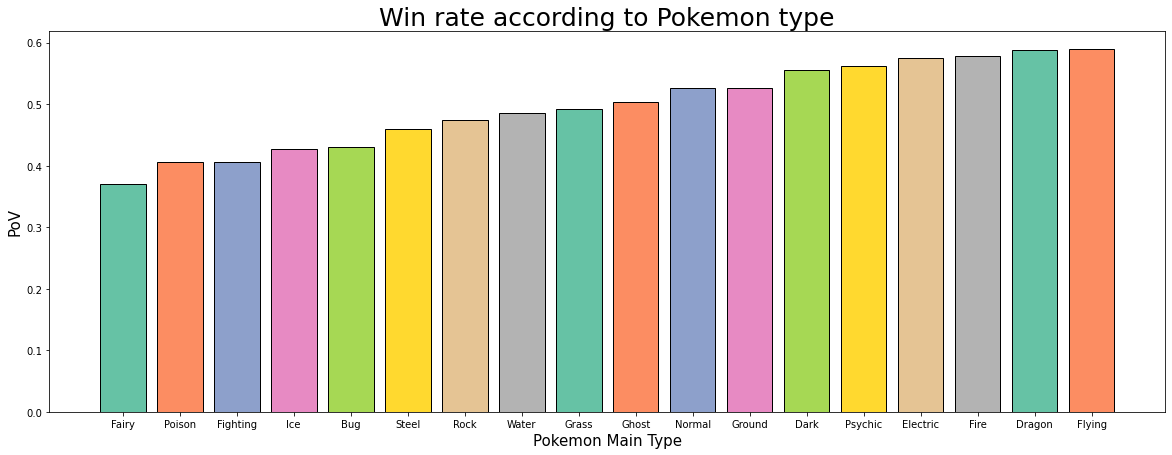

In [226]:
plt.figure(figsize=(20, 7))
colors = sns.color_palette('Set2',len(type1_data))
plt.xlabel('Pokemon Main Type', fontsize=15)
plt.ylabel('PoV', fontsize=15)
plt.title('Win rate according to Pokemon type', fontsize=25)
plt.bar(type1_data.index, type1_data, color=colors, edgecolor='black')

## result3 : 승률이 가장 높은 메인 타입은 'Flying', 가장 낮은 메인 타입은 'Fairy' ##

## 2. 승률과 스탯 ##

In [217]:
p_corr = pokemon_data.corr()[['PoV']][2:8]
p_corr

,PoV
HP,-0.003644
Attack,0.068170
Defense,-0.059109
Sp. Atk,0.112758
Sp. Def,0.043940
Speed,0.273343


Text(0.5, 1.0, 'Percentage of Victory based on type')

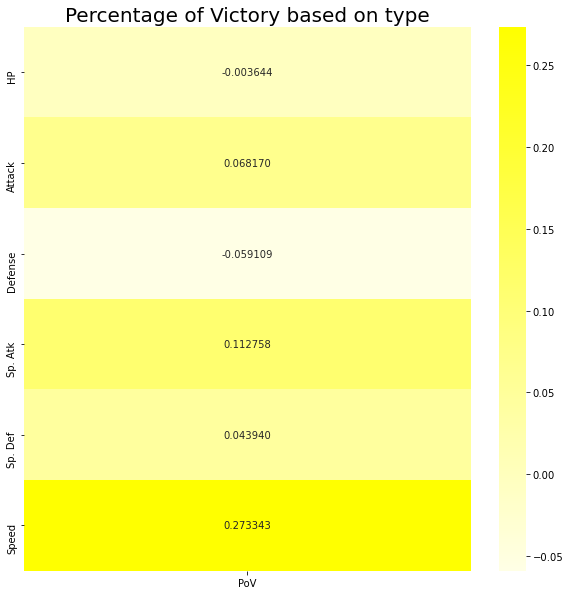

In [234]:
plt.figure(figsize=(10, 10))
sns.heatmap(p_corr, cmap=sns.light_palette("yellow", as_cmap=True), annot=True, fmt="f")
plt.title('Percentage of Victory based on type', fontsize=20)

#### speed와 승률의 상관관계 ####

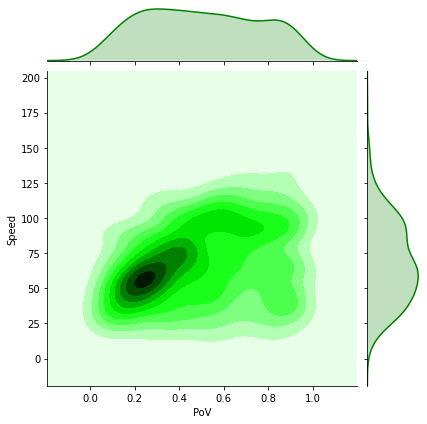

In [240]:
sns.jointplot(x="PoV", y="Speed", data=pokemon_data, kind="kde", color='green')

## result1 : speed와 승률은 양이나 음의 상관관계는 발견할 수 없었고, 승률 0.2정도의 포켓몬들의 속도가 50정도인 경향성이 있음을 발견했다. ###

#### 스탯의 총합치와 승률의 상관관계 ####

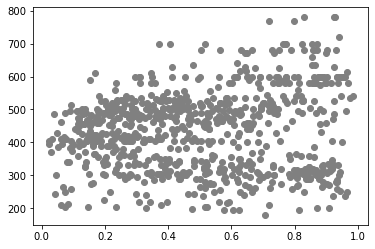

In [253]:
plt.scatter(pokemon_data['PoV'],pokemon_data['Total'], color='gray')

## result2 : 스탯과 승률은 관계가 없다. ###

## 3. 승률과 세대

#### 포켓몬 세대별 승률

In [250]:
generation_data = pokemon_data.groupby(['Generation'])['PoV'].sum() / pokemon_data.groupby(['Generation'])['Name'].count()
generation_data

Generation
1    0.516703
2    0.450161
3    0.477961
4    0.537429
5    0.519905
6    0.491915
dtype: float64

Text(0.5, 1.0, 'Percentage of Victory by Generation')

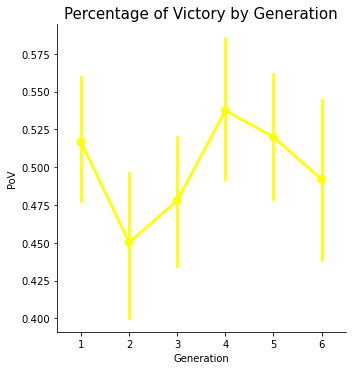

In [255]:
sns.catplot(x='Generation', y='PoV', kind='point', data=pokemon_data, color='yellow')
plt.title('Percentage of Victory by Generation', fontsize=15)

## result1 : 2세대의 승률이 낮은 편이고, 4세대의 승률이 높은 편이다. ###

## 4. 승률과 전설 포켓몬

Text(0.5, 1.0, 'Legendary and PoV')

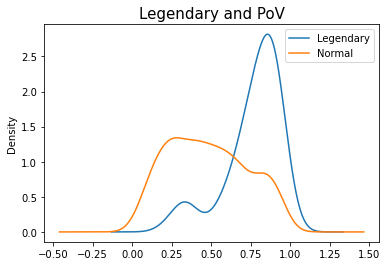

In [263]:
pokemon_data['PoV'][pokemon_data.Legendary == True].plot(kind='kde')
pokemon_data['PoV'][pokemon_data.Legendary == False].plot(kind='kde')
plt.legend(['Legendary', 'Normal'])
plt.title('Legendary and PoV', fontsize=15)

## result1 : 전설 포켓몬의 승률이 일반 포켓몬보다 훨씬 높다. ###